In [1]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_pandas
import numpy as np
import gc
import datetime as dtm


pd.options.plotting.backend = "matplotlib"
tqdm.pandas()
plt.rcParams['font.family'] = ['Microsoft JhengHei'] # 中文標籤
plt.rcParams['axes.unicode_minus'] = False # 負號
pd.set_option('display.max_rows', 200)

<h1> 這邊開始是把Tick檔解壓縮 </h1>

<h5> 先註冊解壓縮程式 </h5>

In [2]:
# 註冊解壓縮
from py7zr import pack_7zarchive, unpack_7zarchive
import shutil
import pprint

# register file format at first.

shutil.register_archive_format('7zip',pack_7zarchive,description='7zip archive')

shutil.register_unpack_format('7zip',['.7z'],unpack_7zarchive,description='7zip archive')

# extraction

#shutil.unpack_archive('test.7z','/tmp')

  

# compression

#shutil.make_archive('target','7zip','src')

pprint.pprint(shutil.get_unpack_formats())

# output:
[('7zip','7zip archive'),('bztar','ZIP file')]


[('7zip', ['.7z'], '7zip archive'),
 ('bztar', ['.tar.bz2', '.tbz2'], "bzip2'ed tar-file"),
 ('gztar', ['.tar.gz', '.tgz'], "gzip'ed tar-file"),
 ('tar', ['.tar'], 'uncompressed tar file'),
 ('xztar', ['.tar.xz', '.txz'], "xz'ed tar-file"),
 ('zip', ['.zip'], 'ZIP file')]


[('7zip', '7zip archive'), ('bztar', 'ZIP file')]

<h5> 設定要取檔的資料夾位置 詳細的到 \\192.168.6.14\StockTick\ 查看 </h5>

In [3]:
# 設定要取檔的資料夾位置 詳細的到 \\192.168.6.14\StockTick\ 查看
path = r'\\192.168.6.14\StockTick\Tse2021'
os.chdir(path)
file_list = os.listdir(path)
#os.chdir(r'D:\股票歷史資料')
for root,dirs,files in os.walk(top=r'D:\股票歷史資料',topdown=False):
    for name in files:
        os.remove(os.path.join(root,name))

# 解壓縮檔案到指定路徑
for i in file_list:
    shutil.unpack_archive(i,r'D:\股票歷史資料')

KeyboardInterrupt: 

In [6]:
inited = True

In [7]:
not inited

False

In [8]:
def on_bar():
    """
    Callback of new bar data update.
    """
    print(1)
    if not inited:
        return
    print(2)

In [9]:
on_bar()

1
2


In [12]:
import numpy as np

In [13]:
open_array: np.ndarray = np.zeros(300)

In [14]:
open_array[-1] = 50

In [16]:
open_array[:-1] = open_array[1:]

In [17]:
open_array

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

<h5> 這邊把解壓縮後的資料合併、並且製作檔案 大約要跑1~2小時 </h5>

In [59]:
file = os.listdir(r'D:\股票歷史資料12')
os.chdir(r'D:\股票歷史資料12')
df = pd.read_csv(file[0], header=None)
df.columns = ['日期','成交時間','成交價','單量','總量','是否為試撮']
df.insert(1, '股票代碼', df.iloc[:, 0].str.split('|', expand=True)[1])
df.loc[:, '日期'] = df.loc[:, '日期'].str.split('|', expand=True)[0]
df['dt'] = '20' + df['日期'] + ' ' + df['成交時間'].astype(str)
df.index = pd.to_datetime(df['dt'], format='%Y%m%d %H%M%S.%f')
df.pop('dt')
df.pop('日期')
df.pop('成交時間')
df = df[df['是否為試撮'] == 'y']
df.pop('是否為試撮')
for i in tqdm(range(1, len(file))):
    df1 = pd.read_csv(file[i], header=None)
    df1.columns = ['日期','成交時間','成交價','單量','總量','是否為試撮']
    df1.insert(1, '股票代碼', df1.iloc[:, 0].str.split('|', expand=True)[1])
    df1.loc[:, '日期'] = df1.loc[:, '日期'].str.split('|', expand=True)[0]
    df1['dt'] = '20' + df1['日期'] + ' ' + df1['成交時間'].astype(str)
    df1.index = pd.to_datetime(df1['dt'], format='%Y%m%d %H%M%S.%f')
    df1.pop('dt')
    df1.pop('日期')
    df1.pop('成交時間')
    df1 = df1[df1['是否為試撮'] == 'y']
    df1.pop('是否為試撮')
    df = df.append(df1)
    del df1
    gc.collect()
#df.loc[:, '成交時間'] = pd.to_datetime(df['成交時間'].astype('str'), format='%H%M%S.%f').dt.time
#df.set_index('成交時間', inplace=True)

# 檔案名稱可在這邊修改
df.to_csv(r'D:\股票歷史資料_合併\tse2021-12.csv')

  0%|          | 0/21 [00:00<?, ?it/s]C:\Users\chiehlinchen\AppData\Local\Temp\ipykernel_2240\759953501.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
  5%|▍         | 1/21 [00:13<04:27, 13.36s/it]C:\Users\chiehlinchen\AppData\Local\Temp\ipykernel_2240\759953501.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
 10%|▉         | 2/21 [00:25<03:55, 12.42s/it]C:\Users\chiehlinchen\AppData\Local\Temp\ipykernel_2240\759953501.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)
 14%|█▍        | 3/21 [00:36<03:30, 11.72s/it]C:\Users\chiehlinchen\AppData\Local\Temp\ipykernel_2240\759953501.py:26: FutureWarning: The frame.append method is deprecated and will be re

In [5]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[0])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\1月\\' + str(i) + '.csv')

In [8]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[1])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\10月\\' + str(i) + '.csv')

In [11]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[2])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\11月\\' + str(i) + '.csv')

In [14]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[3])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\12月\\' + str(i) + '.csv')

In [17]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[4])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\2月\\' + str(i) + '.csv')

In [20]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[5])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\3月\\' + str(i) + '.csv')

In [22]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[6])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\4月\\' + str(i) + '.csv')

100%|██████████| 1129/1129 [38:10<00:00,  2.03s/it]


In [23]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[7])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\5月\\' + str(i) + '.csv')

100%|██████████| 1133/1133 [43:37<00:00,  2.31s/it]


In [24]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[8])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\6月\\' + str(i) + '.csv')

100%|██████████| 1133/1133 [37:34<00:00,  1.99s/it]


In [25]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[9])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\7月\\' + str(i) + '.csv')

100%|██████████| 1130/1130 [41:09<00:00,  2.19s/it]


In [26]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[10])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\8月\\' + str(i) + '.csv')

100%|██████████| 1132/1132 [31:04<00:00,  1.65s/it]


In [27]:
file = os.listdir('D:/股票歷史資料_合併')
os.chdir(r'D:/股票歷史資料_合併')
df = pd.read_csv(file[11])
stock_list = df['股票代碼'].unique()
df['成交量'] = df['單量'] 
df['成交額'] = df['成交價'] * df['單量']
df = df.rename(columns={'成交量':'volume', '成交額':'turnover'})
df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
for i in tqdm(stock_list):
    df_stock= df[df['股票代碼'] == i]
    df_stock = df_stock.resample('min').agg({"成交價":"ohlc","volume":"sum","turnover":"sum"})
    df_stock.columns = df_stock.columns.droplevel()
    df_stock = df_stock.reset_index(drop = False)
    df_stock['dt'] =df_stock['dt'].dt.strftime('%Y/%m/%d %H:%M')
    df_stock = df_stock.rename(columns={"dt":'datetime'}).dropna()
    df_stock.to_csv('D:\\股票歷史資料2021\\9月\\' + str(i) + '.csv')

100%|██████████| 1138/1138 [26:15<00:00,  1.38s/it]


In [59]:
file = os.listdir('D:/股票歷史資料2021')
ls = []
for i in file:
    files = os.listdir('D:/股票歷史資料2021//'+i)
    ls.extend(files)
files = list(set(ls))
stock_dict = dict()
for i in files:
    stock_dict.update({i[0:-4]:pd.DataFrame()})

In [62]:
for i in range(len(file)):
    files = os.listdir('D:/股票歷史資料2021//'+file[i])
    os.chdir(r'D:/股票歷史資料2021//'+file[i])
    for j in tqdm(files):        
        df = pd.read_csv(j)
        df.drop(columns = 'Unnamed: 0',inplace = True)
        stock_dict[j[0:-4]] = pd.concat([stock_dict[j[0:-4]],df],axis=0)
        

100%|██████████| 1138/1138 [00:26<00:00, 43.48it/s]


In [67]:
for key in tqdm(stock_dict.keys()):
    stock_dict[key] = stock_dict[key].sort_values(by='datetime')
    stock_dict[key].to_csv('D:\\股票歷史資料2021\\' + str(key) + '.csv')

In [68]:
from vnpy_datamanager.engine import ManagerEngine
from vnpy.trader.constant import (Exchange, Interval)
from vnpy.trader.engine import BaseEngine, MainEngine, EventEngine

In [79]:
files = os.listdir('D:/股票歷史資料2021//')
os.chdir('D:/股票歷史資料2021//')

In [76]:
stock_ls = []
for i in files:
    if i[-4:] ==".csv":
        stock_ls.append(i)

In [78]:
manager = ManagerEngine(MainEngine,EventEngine)
for j in stock_ls:
    manager.import_data_from_csv("D:\\2330.csv","2330",Exchange.LOCAL,Interval.MINUTE,"Asia/Shanghai","datetime","open","high","low","close","volume","turnover","open_interest","%Y/%m/%d %H:%M")

['0050.csv',
 '0051.csv',
 '0052.csv',
 '0053.csv',
 '0054.csv',
 '0055.csv',
 '0056.csv',
 '0057.csv',
 '0061.csv',
 '006203.csv',
 '006204.csv',
 '006205.csv',
 '006206.csv',
 '006207.csv',
 '006208.csv',
 '00625K.csv',
 '00631L.csv',
 '00632R.csv',
 '00633L.csv',
 '00634R.csv',
 '00635U.csv',
 '00636.csv',
 '00636K.csv',
 '00637L.csv',
 '00638R.csv',
 '00639.csv',
 '00640L.csv',
 '00641R.csv',
 '00642U.csv',
 '00643.csv',
 '00643K.csv',
 '00645.csv',
 '00646.csv',
 '00647L.csv',
 '00648R.csv',
 '00650L.csv',
 '00651R.csv',
 '00652.csv',
 '00653L.csv',
 '00654R.csv',
 '00655L.csv',
 '00656R.csv',
 '00657.csv',
 '00657K.csv',
 '00660.csv',
 '00661.csv',
 '00662.csv',
 '00663L.csv',
 '00664R.csv',
 '00665L.csv',
 '00666R.csv',
 '00668.csv',
 '00668K.csv',
 '00669R.csv',
 '00670L.csv',
 '00671R.csv',
 '00673R.csv',
 '00674R.csv',
 '00675L.csv',
 '00676R.csv',
 '00677U.csv',
 '00678.csv',
 '00680L.csv',
 '00681R.csv',
 '00682U.csv',
 '00683L.csv',
 '00684R.csv',
 '00685L.csv',
 '00686R.c

## 策略開始處

<div> 
    <h2> functions </h2>
    <h5>     price_range 是用來回傳股票價格間距的  </h5>
    <h5>     strategy, long, short 這三大類，都表示交易策略函數  </h5>
</div>

In [1]:
#del df
import copy
import time
import numpy as np
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_pandas
import gc
import datetime as dtm

pd.options.plotting.backend = "matplotlib"
tqdm.pandas()
plt.rcParams['font.family'] = ['Microsoft JhengHei'] # 中文標籤
plt.rcParams['axes.unicode_minus'] = False # 負號
pd.set_option('display.max_rows', 200)
gc.collect()
traded_times = 0

# 設定價格間距 p代入前日收盤價
def price_range(p):
    if p >= 1000:
        return 5
    elif p >= 500:
        return 1
    elif p >= 100:
        return .5
    elif p >= 50:
        return .1
    elif p >= 10:
        return .05
    else:
        return .01

# 計算漲跌停 p代入前日收盤價
#因應不同價格區間取整
def price_limit(p, rate=0.9):
    price_rate = 1 / price_range(p)
    return np.round(p * rate * price_rate, 0) / price_rate


# 大約交易次數: 290.62
# 勝率: 0.51
# 日均獲利: 0.18
def strategy(stock):
#     s = time.time()
    global traded_times
    try:
        #捉取前日收盤價
        last = stock.groupby(pd.Grouper(freq='1d')).tail(1)['成交價']
        last.name = 'last'
        data = pd.merge(stock, last, left_on=stock.index, right_on=last.index, how='outer').fillna(method='ffill').dropna()
        data.set_index('key_0', inplace=True)
        data.loc[:, 'last'] = data.loc[:, 'last'].shift(1)
        #需要使用的值並整理成單一DATAFRAME
        cal_list = [
            data['last'].apply(price_limit, rate=1.1),
            data['last'].apply(price_limit, rate=0.9),
            data['last'].apply(price_limit, rate=1.03),
            data['last'].apply(price_limit, rate=1.055),
            data['last'].apply(price_limit, rate=1.065),
            data['last'].apply(price_limit, rate=1.09)
        ]
        ori_col = list(data.columns)
        ori_col.extend(['漲停', '跌停', '6', '7', '8', '9'])
        data = pd.concat([data, pd.concat(cal_list, axis=1)], axis=1)
        data.columns = ori_col
        #計算每天單檔股票最後交易的TICK時間計算日出場
        dayend = data.groupby(pd.Grouper(freq='1D')).tail(1).index

        name = data.iloc[0, 0]
        data.drop('股票代碼', axis=1, inplace=True)

        entryprice = 0
        #丟棄相同時間下的重覆資料，以最新時間價格無準
        data = data.loc[~data.index.duplicated()]
        idx = data.index[0]
    except Exception as e:
        #Exception保留字，導出錯誤訊息，避險讓程式中斷
        print(e)
        return pd.Series([0], index=['2018-02-06 09:00:00'])

    oi_list = []
    profit_list = []
    cost_list = []
    bs = 0
    close_, tick_, volume_ = None, None, None
    for i in data.iterrows():
        try:
            cost = 0
            row = i[1]
            # 有加_代表前一根
            if close_ == None:
                close_ = row['成交價']
                tick_ = row['單量']
                volume_ = row['總量']
            else:
                close_ = close
                tick_ = tick
                volume_ = volume
                
            close = row['成交價']
            tick = row['單量']
            volume = row['總量']
            maxp = row['漲停']
            minp = row['跌停']
            rate6 = row['6']
            rate7 = row['7']
            rate8 = row['8']
            rate9 = row['9']
            
            # 前值空手時
            profit_list.append(bs * np.log(close / close_))
            
            if bs == 0:
                if (close >= rate7) & (close <= rate8):
                    bs = 1
                    cost = 0.001425 * 0.65
            # 前值有倉時
            elif bs == 1:
                if (close <= rate6) | (close >= rate9):
                    bs = 0
                    cost = 0.001425 * 0.65 + 0.003 * 0.5
#使用ITERROWS時0袋表INDEX，1是內容
            if i[0] in dayend:
                bs = 0
            oi_list.append(bs)
            cost_list.append(cost)
            
            
        except Exception as e:
            print(e)
            return 'error', 'error'
    data_list = [oi_list, profit_list, cost_list]
    new_data = pd.concat([pd.Series(i, index=data.index) for i in data_list], axis=1).rename(columns={0: 'bs', 1: 'profit', 2: 'cost'})
    data = pd.concat([data, new_data], axis=1)
    #data['bs'] = oi_list
    #data['profit'] = profit_list
    #data['cost'] = cost_list
    return (data['profit'] - data['cost']).groupby(pd.Grouper(freq='1D')).sum(), data['profit'].groupby(pd.Grouper(freq='1D')).sum()

def strategy1(stock):
#     s = time.time()
    global traded_times
    try:
        last = stock.groupby(pd.Grouper(freq='1d')).tail(1)['成交價']
        last.name = 'last'
        data = pd.merge(stock, last, left_on=stock.index, right_on=last.index, how='outer').fillna(method='ffill').dropna()
        data.set_index('key_0', inplace=True)
        data.loc[:, 'last'] = data.loc[:, 'last'].shift(1)
        cal_list = [
            data['last'].apply(price_limit, rate=1.1),
            data['last'].apply(price_limit, rate=0.9),
            data['last'].apply(price_limit, rate=1.06),
            data['last'].apply(price_limit, rate=1.09),
            data['last'].apply(price_limit, rate=0.97),
            data['成交價'].rolling(100).mean(),
            data['成交價'].rolling(500).mean(),
            data['成交價'].rolling(100).mean().apply(price_limit, rate=1.05),
            data['成交價'].rolling(100).mean().apply(price_limit, rate=0.95),
            data['成交價'].rolling(100).mean().apply(price_limit, rate=1.1)
        ]
        ori_col = list(data.columns)
        ori_col.extend(['漲停', '跌停', '6', '9', '_3', 'm300', 'm1000','upb', 'dnb', 'upt'])
        data = pd.concat([data, pd.concat(cal_list, axis=1)], axis=1)
        data.columns = ori_col
        dayend = data.groupby(pd.Grouper(freq='1D')).tail(1).index

        name = data.iloc[0, 0]
        data.drop('股票代碼', axis=1, inplace=True)

        entryprice = 0
        data = data.loc[~data.index.duplicated()]
        idx = data.index[0]
    except Exception as e:
        print(e)
        return pd.Series([0], index=['2018-02-06 09:00:00'])

    oi_list = []
    profit_list = []
    cost_list = []
    bs = 0
    ticker = 0
    close_, tick_, volume_ = None, None, None
    for i in data.iterrows():
        ticker += 1
        if i[0].time() < dtm.time(9, 0):
            oi_list.append(0)
            profit_list.append(0)
            cost_list.append(0)
            continue
        try:
            cost = 0
            row = i[1]
            # 前一根
            if close_ == None:
                close_ = row['成交價']
                tick_ = row['單量']
                volume_ = row['總量']
            else:
                close_ = close
                tick_ = tick
                volume_ = volume
                
            close = row['成交價']
            tick = row['單量']
            volume = row['總量']
            maxp = row['漲停']
            minp = row['跌停']
            m300 = row['m300']
            m1000 = row['m1000']
            upb = row['upb']
            dnb = row['dnb']
            upt = row['upt']
            rate6 = row['6']
            rate9 = row['9']
            
            rate_3 = row['_3']
            
            # 前值空手時
            profit_list.append(bs * np.log(close / close_))
            
            if bs == 0:
                if (close >= upb) & (close <= rate6) & (close >= rate_3) & (m300 >= m1000) & (ticker < 1000):
                    bs = 1
                    cost = 0.001425 * 0.65
            # 前值有倉時
            elif bs == 1:
                if (close <= dnb) | (close <= minp) | (close >= rate9) | (close >= upt):
                    bs = 0
                    cost = 0.001425 * 0.65 + 0.003 * 0.5

            if i[0] in dayend:
                bs = 0
                ticker = 0
            oi_list.append(bs)
            cost_list.append(cost)
            
            
        except Exception as e:
            print(e)
            return 'error', 'error'
    data_list = [oi_list, profit_list, cost_list]
    new_data = pd.concat([pd.Series(i, index=data.index) for i in data_list], axis=1).rename(columns={0: 'bs', 1: 'profit', 2: 'cost'})
    data = pd.concat([data, new_data], axis=1)
    #data['bs'] = oi_list
    #data['profit'] = profit_list
    #data['cost'] = cost_list
    return (data['profit'] - data['cost']).groupby(pd.Grouper(freq='1D')).sum(), data['profit'].groupby(pd.Grouper(freq='1D')).sum()



In [3]:
def strategy2(stock):
    global traded_times
    try:
        last = stock['成交價'].groupby(pd.Grouper(freq='1d')).tail(1)
        last.name = 'last'
        high = stock['成交價'].groupby(pd.Grouper(freq='1d')).max().dropna()
        high.name = 'high'
        high.index = last.index
        low = stock['成交價'].groupby(pd.Grouper(freq='1d')).min().dropna()
        low.name ='low'
        low.index = last.index
        last = pd.concat([last, high, low], axis=1)
        data = pd.merge(stock, last, left_on=stock.index, right_on=last.index, how='outer').fillna(method='ffill').dropna()
        data.set_index('key_0', inplace=True)
        data.loc[:, ['last', 'high', 'low']] = data.loc[:, ['last', 'high', 'low']].shift(1)
        cal_list = [
            data['last'].apply(price_limit, rate=1.1),
            data['last'].apply(price_limit, rate=0.9),
            data['high'].apply(price_limit, rate=1.025),
            data['high'].apply(price_limit, rate=1.035),
            data['low'].apply(price_limit, rate=1.00),
            data['high'].apply(price_limit, rate=1.09),
            data['last'].apply(price_limit, rate=1.06),
            data['last'].apply(price_limit, rate=1.09),
            data['last'].apply(price_limit, rate=0.93)
        ]
        ori_col = list(data.columns)
        ori_col.extend(['漲停', '跌停', 'upb', 'upt1', 'dnb', 'upt', 'upl', 'rate9', 'dnl'])
        data = pd.concat([data, pd.concat(cal_list, axis=1)], axis=1)
        data.columns = ori_col
        dayend = data.groupby(pd.Grouper(freq='1D')).tail(1).index

        name = data.iloc[0, 0]
        data.drop('股票代碼', axis=1, inplace=True)

        entryprice = 0
        data = data.loc[~data.index.duplicated()]
        idx = data.index[0]
    except Exception as e:
        print(e)
        return pd.Series([0], index=['2018-02-06 09:00:00'])

    oi_list = []
    profit_list = []
    cost_list = []
    bs = 0
    ticker = 0
    mean = 0
    cum = 0
    close_, tick_, volume_ = None, None, None
    for i in data.iterrows():
        ticker += 1
        if i[0].time() < dtm.time(9, 0):
            oi_list.append(0)
            profit_list.append(0)
            cost_list.append(0)
            continue
        try:
            cost = 0
            row = i[1]
            # 前一根
            if close_ == None:
                close_ = row['成交價']
                tick_ = row['單量']
                volume_ = row['總量']
            else:
                close_ = close
                tick_ = tick
                volume_ = volume

            close = row['成交價']
            tick = row['單量']
            volume = row['總量']
            maxp = row['漲停']
            minp = row['跌停']
            upb = row['upb']
            dnb = row['dnb']
            upt = row['upt']
            upt1 = row['upt1']
            upl = row['upl']
            dnl = row['dnl']
            rate9 = row['rate9']
            cum += close
            mean = cum / ticker
            # 前值空手時
            profit_list.append(bs * np.log(close / close_))
            
            if bs == 0:
                if (close >= upb) & (close <= upl) & (ticker > 1000) & (close >= dnl) & (close < upt1) & (close > mean *1.02):
                    if (close <= dnb) | (close <= minp) | (close >= upt) | (close >= rate9):
                        print(name)
                    bs = 1
                    cost = 0.001425 * 0.65
            # 前值有倉時
            elif bs == 1:
                if (close <= minp) | (close >= upt) | (close >= rate9) | (close <= dnb):
                    bs = 0
                    cost = 0.001425 * 0.65 + 0.003 * 0.5

            if i[0] in dayend:
                bs = 0
                ticker = 0
                cum = 0
            oi_list.append(bs)
            cost_list.append(cost)
            
            
        except Exception as e:
            print(e)
            return 'error', 'error'
    data_list = [oi_list, profit_list, cost_list]
    new_data = pd.concat([pd.Series(i, index=data.index) for i in data_list], axis=1).rename(columns={0: 'bs', 1: 'profit', 2: 'cost'})
    data = pd.concat([data, new_data], axis=1)
    return (data['profit'] - data['cost']).groupby(pd.Grouper(freq='1D')).sum(), data['profit'].groupby(pd.Grouper(freq='1D')).sum()

In [29]:
def short(stock):
    global traded_times
    try:
        last = stock['成交價'].groupby(pd.Grouper(freq='1d')).tail(1)
        last.name = 'last'
        high = stock['成交價'].groupby(pd.Grouper(freq='1d')).max().dropna()
        high.name = 'high'
        high.index = last.index
        low = stock['成交價'].groupby(pd.Grouper(freq='1d')).min().dropna()
        low.name ='low'
        low.index = last.index
        last = pd.concat([last, high, low], axis=1)
        data = pd.merge(stock, last, left_on=stock.index, right_on=last.index, how='outer').fillna(method='ffill').dropna()
        data.set_index('key_0', inplace=True)
        data.loc[:, ['last', 'high', 'low']] = data.loc[:, ['last', 'high', 'low']].shift(1)
        cal_list = [
            data['last'].apply(price_limit, rate=1.1), # 漲停
            data['last'].apply(price_limit, rate=0.9), # 跌停
            data['last'].apply(price_limit, rate=1.05), # 多單限制
            data['last'].apply(price_limit, rate=0.95), # 空單限制
        ]
        ori_col = list(data.columns)
        ori_col.extend(['漲停', '跌停', 'up_limit', 'dn_limit'])
        data = pd.concat([data, pd.concat(cal_list, axis=1)], axis=1)
        data.columns = ori_col
        dayend = data.groupby(pd.Grouper(freq='1D')).tail(1).index

        name = data.iloc[0, 0]
        data.drop('股票代碼', axis=1, inplace=True)

        entryprice = 0
        data = data.loc[~data.index.duplicated()]
        idx = data.index[0]
    except Exception as e:
        print(e)
        return pd.Series([0], index=['2018-02-06 09:00:00'])

    oi_list = []
    profit_list = []
    cost_list = []
    bs = 0
    ticker = 0
    mean = 0
    cum = 0
    
    highd = 0
    lowd = 0
    entry = 0
    close_, tick_, volume_ = None, None, None
    for i in data.iterrows():
        ticker += 1
        if i[0].time() < dtm.time(9, 0):
            oi_list.append(0)
            profit_list.append(0)
            cost_list.append(0)
            continue
        try:
            cost = 0
            row = i[1]
            # 前一根
            if close_ == None:
                close_ = row['成交價']
                tick_ = row['單量']
                volume_ = row['總量']
            else:
                close_ = close
                tick_ = tick
                volume_ = volume

            close = row['成交價']
            tick = row['單量']
            volume = row['總量']
            maxp = row['漲停']
            minp = row['跌停']
            up_limit = row['up_limit']
            dn_limit = row['dn_limit']
            
            if (highd == 0) & (lowd == 0):
                highd = close
                lowd = close
            else:
                highd = max(highd, close)
                lowd = min(lowd, close)
            
            cum += close
            mean = cum / ticker
            # 前值空手時
            profit_list.append(bs * np.log(close / close_))
            
            if bs == 0:
                if (close <= highd * 0.95) & (close >= highd * 0.93) & (close > dn_limit):
                    bs = -1
                    cost = 0.001425 * 0.65
                    entry = close
            # 前值有倉時
            elif bs == -1:
                if (close <= entry * 0.97) | (close >= entry * 1.03):
                    bs = 0
                    cost = 0.001425 * 0.65 + 0.003 * 0.5
            
            # 尾盤重置
            if i[0] in dayend:
                bs = 0
                ticker = 0
                cum = 0
                highd = 0
                lowd = 0
            oi_list.append(bs)
            cost_list.append(cost)
            
            
        except Exception as e:
            print(e)
            return 'error', 'error'
    data_list = [oi_list, profit_list, cost_list]
    new_data = pd.concat([pd.Series(i, index=data.index) for i in data_list], axis=1).rename(columns={0: 'bs', 1: 'profit', 2: 'cost'})
    data = pd.concat([data, new_data], axis=1)
    return (data['profit'] - data['cost']).groupby(pd.Grouper(freq='1D')).sum(), data['profit'].groupby(pd.Grouper(freq='1D')).sum()
    #return data

In [43]:
def long(stock):
    global traded_times
    try:
        last = stock['成交價'].groupby(pd.Grouper(freq='1d')).tail(1)
        last.name = 'last'
        high = stock['成交價'].groupby(pd.Grouper(freq='1d')).max().dropna()
        high.name = 'high'
        high.index = last.index
        low = stock['成交價'].groupby(pd.Grouper(freq='1d')).min().dropna()
        low.name ='low'
        low.index = last.index
        last = pd.concat([last, high, low], axis=1)
        data = pd.merge(stock, last, left_on=stock.index, right_on=last.index, how='outer').fillna(method='ffill').dropna()
        data.set_index('key_0', inplace=True)
        data.loc[:, ['last', 'high', 'low']] = data.loc[:, ['last', 'high', 'low']].shift(1)
        cal_list = [
            data['last'].apply(price_limit, rate=1.1), # 漲停
            data['last'].apply(price_limit, rate=0.9), # 跌停
            data['last'].apply(price_limit, rate=1.05), # 多單限制
            data['last'].apply(price_limit, rate=0.95), # 空單限制
        ]
        ori_col = list(data.columns)
        ori_col.extend(['漲停', '跌停', 'up_limit', 'dn_limit'])
        data = pd.concat([data, pd.concat(cal_list, axis=1)], axis=1)
        data.columns = ori_col
        dayend = data.groupby(pd.Grouper(freq='1D')).tail(1).index

        name = data.iloc[0, 0]
        data.drop('股票代碼', axis=1, inplace=True)

        entryprice = 0
        data = data.loc[~data.index.duplicated()]
        idx = data.index[0]
    except Exception as e:
        print(e)
        return pd.Series([0], index=['2018-02-06 09:00:00'])

    oi_list = []
    profit_list = []
    cost_list = []
    bs = 0
    ticker = 0
    mean = 0
    cum = 0
    
    highd = 0
    lowd = 0
    entry = 0
    close_, tick_, volume_ = None, None, None
    for i in data.iterrows():
        ticker += 1
        if i[0].time() < dtm.time(9, 0):
            oi_list.append(0)
            profit_list.append(0)
            cost_list.append(0)
            continue
        try:
            cost = 0
            row = i[1]
            # 前一根
            if close_ == None:
                close_ = row['成交價']
                tick_ = row['單量']
                volume_ = row['總量']
            else:
                close_ = close
                tick_ = tick
                volume_ = volume

            close = row['成交價']
            tick = row['單量']
            volume = row['總量']
            maxp = row['漲停']
            minp = row['跌停']
            up_limit = row['up_limit']
            dn_limit = row['dn_limit']
            
            if (highd == 0) & (lowd == 0):
                highd = close
                lowd = close
            else:
                highd = max(highd, close)
                lowd = min(lowd, close)
            
            cum += close
            mean = cum / ticker
            # 前值空手時
            profit_list.append(bs * np.log(close / close_))
            
            if bs == 0:
                if (close >= lowd * 1.05) & (close < lowd * 1.07) & (close < up_limit):
                    bs = 1
                    entry = close
                    cost = 0.001425 * 0.65
            # 前值有倉時
            elif bs == 1:
                if (close >= entry * 1.04) | (close <= entry * 0.97):
                    bs = 0
                    cost = 0.001425 * 0.65 + 0.003 * 0.5
            
            # 尾盤重置
            if i[0] in dayend:
                bs = 0
                ticker = 0
                cum = 0
                highd = 0
                lowd = 0
            oi_list.append(bs)
            cost_list.append(cost)
            
            
        except Exception as e:
            print(e)
            return 'error', 'error'
    data_list = [oi_list, profit_list, cost_list]
    new_data = pd.concat([pd.Series(i, index=data.index) for i in data_list], axis=1).rename(columns={0: 'bs', 1: 'profit', 2: 'cost'})
    data = pd.concat([data, new_data], axis=1)
    return (data['profit'] - data['cost']).groupby(pd.Grouper(freq='1D')).sum(), data['profit'].groupby(pd.Grouper(freq='1D')).sum()
    #return data

## 實際計算策略 要使用不同策略時則改變「策略決定點」使用的function

In [2]:

import datetime
path = r'D:\股票歷史資料_2021_1'
os.chdir(path)
data_list = os.listdir(path)
df_combine = pd.DataFrame()
df_combine1 = pd.DataFrame()
for i in tqdm(data_list):
    size = os.path.getsize(i)

    if size > 20000000:
        df = pd.read_csv(i, index_col='dt', dtype={'股票代碼': str}).drop('Unnamed: 0', axis=1)
        df.index = pd.to_datetime(df.index)
        df = df[(df.index.time >= dtm.time(9, 0)) & (df.index.time <= dtm.time(13, 30)) & (df.index.month <= 12)]
        profit, profit1 = long(df) # 策略決定點 #########################################################
        if type(profit) == str:
            continue
        profit.name = i.split('.')[0]
        
        if len(df_combine) == 0:
            df_combine = profit
            df_combine1 = profit1
        else:
            df_combine = pd.concat([df_combine, profit], axis=1, join='outer')
            df_combine1 = pd.concat([df_combine1, profit1], axis=1, join='outer')

        del profit
        del df 
        gc.collect()
print('finish time: {}'.format(datetime.datetime.now()))
df_combine.sum(axis=1).cumsum().plot(title='2018年損益 ', figsize=(16, 11))
df_combine1.sum(axis=1).cumsum().plot()

 36%|███▋      | 409/1126 [00:02<00:03, 191.35it/s]


NameError: name 'long' is not defined

<AxesSubplot:title={'center':'2018年損益 '}, xlabel='key_0'>

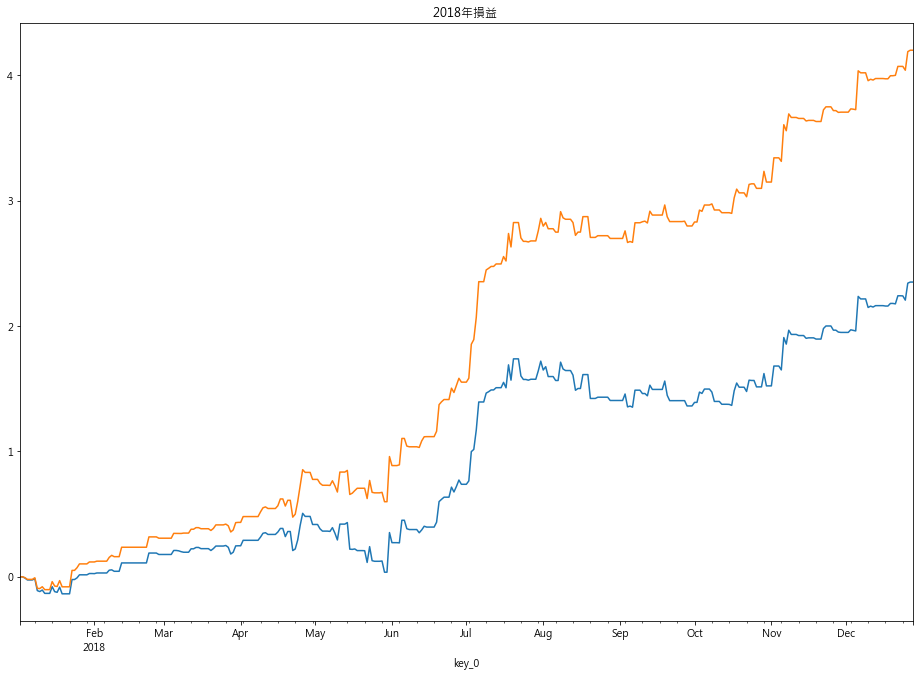

In [31]:
df_combine.sum(axis=1).cumsum().plot(title='2018年損益 ', figsize=(16, 11))
df_combine1.sum(axis=1).cumsum().plot()

<h3> 後面開始就是雜項，可刪除 </h3>

In [22]:

import datetime
path = r'D:\股票歷史資料_2018'
os.chdir(path)
data_list = os.listdir(path)
df_combine = pd.DataFrame()
df_combine1 = pd.DataFrame()
i = data_list[200]
#size = os.path.getsize(i)

#if size > 5000000:
df = pd.read_csv(i, index_col='dt', dtype={'股票代碼': str}).drop('Unnamed: 0', axis=1)
df.index = pd.to_datetime(df.index)
df = df[(df.index.time >= dtm.time(9, 0)) & (df.index.time <= dtm.time(13, 30)) & (df.index.month <= 12)]
#profit, profit1 = short(df)
data = short(df)
profit.name = i.split('.')[0]

if len(df_combine) == 0:
    df_combine = profit
    df_combine1 = profit1
else:
    df_combine = pd.concat([df_combine, profit], axis=1, join='outer')
    df_combine1 = pd.concat([df_combine1, profit1], axis=1, join='outer')

#del profit
#del df 
gc.collect()
print('finish time: {}'.format(datetime.datetime.now()))
#df_combine.sum(axis=1).cumsum().plot(title='2018年損益 ', figsize=(16, 11))
#df_combine1.sum(axis=1).cumsum().plot()

finish time: 2022-05-31 12:35:04.981900


In [28]:
data['2018-03'].to_csv('test.csv')

<ipython-input-28-1ba648ae272b>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data['2018-03'].to_csv('test.csv')


In [32]:
#(df_combine.sum(axis=1) - df_combine1.sum(axis=1)).cumsum() # 累計手續費
print('大約交易次數: {:.2f}'.format(-(df_combine.sum(axis=1) - df_combine1.sum(axis=1)).cumsum().iloc[-1] / 0.0033525)) # 
print('勝率: {:.2f}'.format(sum(df_combine.sum(axis=1)>0) / sum(df_combine.sum(axis=1)!=0))) # 勝率
print('日均獲利: {:.2f}'.format(df_combine.sum(axis=1)[df_combine.sum(axis=1) != 0].mean() * 100)) # 日均獲利

大約交易次數: 551.81
勝率: 0.51
日均獲利: 1.22


In [10]:

import datetime
path = r'D:\股票歷史資料_2018'
os.chdir(path)
data_list = os.listdir(path)
df_combine = pd.DataFrame()
df_combine1 = pd.DataFrame()
for i in tqdm(data_list):
    size = os.path.getsize(i)

    if size > 5000000:
        df = pd.read_csv(i, index_col='dt', dtype={'股票代碼': str}).drop('Unnamed: 0', axis=1)
        df.index = pd.to_datetime(df.index)
        df = df[(df.index.time >= dtm.time(9, 0)) & (df.index.time <= dtm.time(13, 30)) & (df.index.month <= 12)]
        profit, profit1 = long(df)
        if type(profit) == str:
            continue
        profit.name = i.split('.')[0]
        
        if len(df_combine) == 0:
            df_combine = profit
            df_combine1 = profit1
        else:
            df_combine = pd.concat([df_combine, profit], axis=1, join='outer')
            df_combine1 = pd.concat([df_combine1, profit1], axis=1, join='outer')

        del profit
        del df 
        gc.collect()
print('finish time: {}'.format(datetime.datetime.now()))
df_combine.sum(axis=1).cumsum().plot(title='2018年損益 ', figsize=(16, 11))
df_combine1.sum(axis=1).cumsum().plot()

  2%|█▍                                                                            | 20/1091 [02:04<1:50:51,  6.21s/it]


KeyboardInterrupt: 

In [285]:
        df = pd.read_csv(i, index_col='dt', dtype={'股票代碼': str}).drop('Unnamed: 0', axis=1)
        df.index = pd.to_datetime(df.index)
        df = df[(df.index.time >= dtm.time(9, 0)) & (df.index.time <= dtm.time(13, 30))]

In [296]:
df['成交價'].groupby(pd.Grouper(freq='1d')).tail(1).dropna()

dt
2018-01-02 13:30:00    30.30
2018-01-03 13:30:00    31.35
2018-01-04 13:30:00    30.80
2018-01-05 13:30:00    30.80
2018-01-08 13:30:00    31.00
                       ...  
2018-12-24 13:30:00    40.00
2018-12-25 13:30:00    39.15
2018-12-26 13:30:00    38.70
2018-12-27 13:30:00    39.35
2018-12-28 13:30:00    39.25
Name: 成交價, Length: 248, dtype: float64

In [88]:
df = pd.read_csv('2344.csv', index_col='dt', dtype={'股票代碼': str}).drop('Unnamed: 0', axis=1)
df.index = pd.to_datetime(df.index)
df = df[(df.index.time > dtm.time(9, 0)) & (df.index.time < dtm.time(13, 30))] 
profit = strategy(df)

<AxesSubplot:xlabel='key_0'>

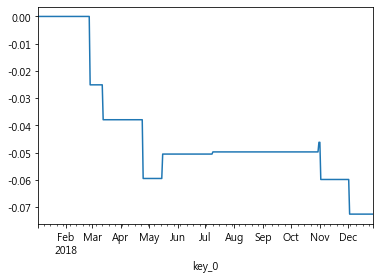

In [92]:
profit.cumsum().plot()#.loc['2018-02-06 11:30': '2018-02-06 12:00']#.cumsum().plot()

In [308]:
df = pd.read_csv('2330.csv', index_col='dt', dtype={'股票代碼': str}).drop('Unnamed: 0', axis=1)
df.index = pd.to_datetime(df.index)
df = df[(df.index.time > dtm.time(9, 0)) & (df.index.time < dtm.time(13, 30))] 
stock = df
last = stock['成交價'].groupby(pd.Grouper(freq='1d')).tail(1)
last.name = 'last'
high = stock['成交價'].groupby(pd.Grouper(freq='1d')).max().dropna()
high.name = 'high'
high.index = last.index
low = stock['成交價'].groupby(pd.Grouper(freq='1d')).min().dropna()
low.name ='low'
low.index = last.index
last = pd.concat([last, high, low], axis=1)
data = pd.merge(stock, last, left_on=stock.index, right_on=last.index, how='outer').fillna(method='ffill').dropna()
data.set_index('key_0', inplace=True)
data.loc[:, ['last', 'high', 'low']] = data.loc[:, ['last', 'high', 'low']].shift(1)
cal_list = [
    data['last'].apply(price_limit, rate=1.1),
    data['last'].apply(price_limit, rate=0.9),
    data['high'].apply(price_limit, rate=1.03),
    data['low'].apply(price_limit, rate=0.97),
    data['high'].apply(price_limit, rate=1.05),
    data['last'].apply(price_limit, rate=1.06),
    data['last'].apply(price_limit, rate=1.09),
    data['last'].apply(price_limit, rate=0.96)
]
ori_col = list(data.columns)
ori_col.extend(['漲停', '跌停', 'upb', 'dnb', 'upt', 'upl', 'rate9', 'dnl'])
data = pd.concat([data, pd.concat(cal_list, axis=1)], axis=1)
data.columns = ori_col

In [309]:
data

,股票代碼,成交價,單量,總量,last,high,low,漲停,跌停,upb,dnb,upt,upl,rate9,dnl
key_0,,,,,,,,,,,,,,,
2018-01-02 13:24:59.435884,2330,232.0,4,15233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 09:00:00.848127,2330,236.0,1807,1807,232.0,232.5,231.0,255.0,209.0,239.5,224.0,244.0,246.0,253.0,222.5
2018-01-03 09:00:05.960760,2330,235.5,9,1816,232.0,232.5,231.0,255.0,209.0,239.5,224.0,244.0,246.0,253.0,222.5
2018-01-03 09:00:11.090457,2330,236.0,3,1819,232.0,232.5,231.0,255.0,209.0,239.5,224.0,244.0,246.0,253.0,222.5
2018-01-03 09:00:16.217668,2330,236.0,32,1851,232.0,232.5,231.0,255.0,209.0,239.5,224.0,244.0,246.0,253.0,222.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-28 13:24:38.922070,2330,225.0,13,22431,222.5,224.0,220.5,245.0,200.0,230.5,214.0,235.0,236.0,242.5,213.5
2018-12-28 13:24:43.942457,2330,225.0,77,22508,222.5,224.0,220.5,245.0,200.0,230.5,214.0,235.0,236.0,242.5,213.5
2018-12-28 13:24:48.962798,2330,225.0,127,22635,222.5,224.0,220.5,245.0,200.0,230.5,214.0,235.0,236.0,242.5,213.5


In [149]:
    df = pd.read_csv('1338.csv', index_col='dt', dtype={'股票代碼': str}).drop('Unnamed: 0', axis=1)
    df.index = pd.to_datetime(df.index)
    df = df[(df.index.time > dtm.time(9, 0)) & (df.index.time < dtm.time(13, 30))] 
    stock = df
    rate_begin = 1.06
    last = stock.groupby(pd.Grouper(freq='1d')).tail(1)['成交價']
    last.name = 'last'
    data = pd.merge(stock, last, left_on=stock.index, right_on=last.index, how='outer').fillna(method='ffill').dropna()
    data.set_index('key_0', inplace=True)
    data.loc[:, 'last'] = data.loc[:, 'last'].shift(1)
    cal_list = [
        data['last'].apply(price_limit, rate=1.1),
        data['last'].apply(price_limit, rate=0.9),
        data['last'].apply(price_limit, rate=1.03),
        data['last'].apply(price_limit, rate=1.05),
        data['last'].apply(price_limit, rate=1.06),
        data['last'].apply(price_limit, rate=1.095)
    ]
    ori_col = list(data.columns)
    ori_col.extend(['漲停', '跌停', '6', '7', '8', '9'])
    data = pd.concat([data, pd.concat(cal_list, axis=1)], axis=1)
    data.columns = ori_col
#     data = pd.concat([data, pd.concat(cal_list, axis=1)], axis=1)
#     data.rename(columns={
#         0: '漲停',
#         1: '跌停',
#         2: '6',
#         3: '7',
#         4: '8',
#         5: '9'
#     }, inplace=True)
#     data['漲停'] = data['last'].apply(price_limit, rate=1.1)
#     data['跌停'] = data['last'].apply(price_limit, rate=0.9)
#     data['6'] = data['last'].apply(price_limit, rate=1.04)
#     data['7'] = data['last'].apply(price_limit, rate=1.07)
#     data['8'] = data['last'].apply(price_limit, rate=1.08)
#     data['9'] = data['last'].apply(price_limit, rate=1.095)
    dayend = data.groupby(pd.Grouper(freq='1D')).tail(1).index
    
    name = data.iloc[0, 0]
    data.drop('股票代碼', axis=1, inplace=True)
    
    entryprice = 0
    data = data.loc[~data.index.duplicated()]
    idx = data.index[0]

    oi_list = []
    profit_list = []
    cost_list = []
    bs = 0
    close_, tick_, volume_ = None, None, None
    for i in data.iterrows():
        try:
            cost = 0
            row = i[1]
            # 前一根
            if close_ == None:
                close_ = row['成交價']
                tick_ = row['單量']
                volume_ = row['總量']
            else:
                close_ = close
                tick_ = tick
                volume_ = volume
                
            close = row['成交價']
            tick = row['單量']
            volume = row['總量']
            maxp = row['漲停']
            minp = row['跌停']
            rate6 = row['6']
            rate7 = row['7']
            rate8 = row['8']
            rate9 = row['9']
            
            # 前值空手時
            profit_list.append(bs * np.log(close / close_))
            
            if bs == 0:
                if (close >= rate7) & (close <= rate8):
                    bs = 1
                    cost = 0.001425 * 0.65
            # 前值有倉時
            elif bs == 1:
                if (close <= rate6) | (close >= rate9):
                    bs = 0
                    cost = 0.001425 * 0.65 + 0.003 * 0.5

            if i[0] in dayend:
                bs = 0
            oi_list.append(bs)
            cost_list.append(cost)
            
            
        except Exception as e:
            print(e)
    
    data.loc[:, 'bs'] = oi_list
    data.loc[:, 'profit'] = profit_list
    data.loc[:, 'cost'] = cost_list

<AxesSubplot:xlabel='key_0'>

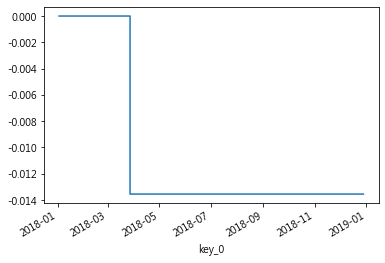

In [129]:
new_data_list = [oi_list, profit_list, cost_list]
pd.concat([pd.Series(index=data.index, i) for i in new_data_list])

In [163]:
pd.concat([data, data.groupby(pd.Grouper(freq='1D')).tail(1)], axis=1)

,成交價,單量,總量,last,漲停,跌停,6,7,8,9,...,last,漲停,跌停,6,7,8,9,bs,profit,cost
key_0,,,,,,,,,,,,,,,,,,,,,
2018-01-02 13:24:51.694948,115.0,3,696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-03 09:00:19.906971,115.5,10,10,115.0,126.5,103.5,118.5,121.0,122.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 09:00:25.004473,115.5,3,13,115.0,126.5,103.5,118.5,121.0,122.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 09:00:30.115632,115.5,1,14,115.0,126.5,103.5,118.5,121.0,122.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 09:00:55.753370,115.5,1,15,115.0,126.5,103.5,118.5,121.0,122.0,126.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-28 13:14:01.018433,75.2,1,313,75.6,83.2,68.0,77.9,79.4,80.1,82.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28 13:16:21.549898,75.1,5,318,75.6,83.2,68.0,77.9,79.4,80.1,82.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-28 13:24:38.922070,75.1,1,319,75.6,83.2,68.0,77.9,79.4,80.1,82.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
